# <center> Impulsive Noise Removal Using PWL Filters </center>

**<center> Devinn Doering, Nathan Hartman </center>**

*<center> ON DESCRIPTION OF IMPULSIVE NOISE REMOVAL USING PWL FILTER MODEL </center>*

### Table of Contents
1. [Problem Overview](#Problem-Overview)
2. [Generation of Test Data](#Generation-of-Test-Data)
3. [Filter Model](#Filter-Model)
    * a. [Observations](#Observations)
    * b. [Rudimentary Model](#Rudimentary-Model)
    * c. [Model Refinement](#Model-Refinement)
4. [Implementation](#Implementation)
5. [Filter Performance](#Filter-Performance)
    * a. [Image 1 Results](#Image-1-Results)
    * b. [Image 2 Results](#Image-2-Results)
    * c. [Image 3 Results](#Image-3-Results)
6. [Conclusion](#Conclusion)

### Problem Overview
A very common source of noise in the generation and transmission of signals is in the form of impulsive noise. In images, impulsive noise manifests as discrete, isolated pixel variations that often appear random. Obviously, noise of this form decreases signal quality and so it is beneficial to identify and remove the impulsive noise from the received image.

Traditionally, impulsive noise removal consists of two steps:
1. Impulse Detection
2. Estimation of Correct Value

Firstly, we identify the pixels that are affected by impulsive noise. Next, we estimate the value of that pixel prior to the addition of the noise.

Historically, the filter model used to remove such impulsive noise was a simple median filter that averages out the amplitude of pixel values within a window. Unfortunately, the downside of such simple models is that the resultant image is smoothed out which severely degrades image quality.

Our paper provides an improved filter model that can detect the impulsive noise and remove it without the image quality degradation that we have previously seen in median filters.

### Generation of Test Data
To replicate the results of our paper, we use commonly recognizable 256 x 256 pixel, grayscale images to illustrate the visual performance of the algorithm. We selected three images to use.

<center><img src="images/pic1.jpg"/></center>
<p style="text-align: center"><i>Image 1</i></p>

<center><img src="images/pic2.jpg"/></center>
<p style="text-align: center"><i>Image 2</i></p>

<center><img src="images/pic3.jpg"/></center>
<p style="text-align: center"><i>Image 3</i></p>

To introduce noise to these images, we randomly choose pixels to add an impulsive noise to, by either decreasing or increasing the value of that pixel. This allows us to very easily generate good test data for our filter.

For our implementation, we followed the simulation that was done in the paper and use an impulse amplitude of 100 with a frequency of 10%. 

Later on, we discovered that lowering the noise probability even to 5% greatly improves the visual performance of the filter. This is comforting since in reality, a noise probability of 10% or even 5% is quite high in real applications, and the filter's performance at lower, more realistic noise probabilities is quite exceptional. 

### Filter Model
#### Observations
To perform the impulsive noise detection and correct the noisy image, we follow the filter model described by our publication. We first recognize that an image that is corrupted with random, discrete impulsive noise appears as:
$$ x_{i,j} = 
  \begin{cases}
    s_{i,j}, & 1 - p,\\
    s_{i,j} + i_{i,j}, & p
  \end{cases}
$$

Where $s_{i,j}$ is the original image signal for some pixel with indices {i,j}, $i_{i,j}$ is the impulsive noise for that pixel and $p$ is the probability that an arbitrary pixel is corrupted by noise. Now, we see that $x_{i,j}$ is a piecewise-linear (PWL) function.

#### Rudimentary Model
As a first approach to the detection and removal of this impulsive noise from the image, we can take advantage of the difference in value between a corrupted pixel and the mean of the region in which it resides.

To detect the presence of an impulse on a given pixel, we compare the value of that pixel, $x_{i,j}$ with the median value of pixels in that region, $m_{i,j}$. If we find that $x_{i,j}$ is sufficiently different from $m_{i,j}$, *i.e. $x_{i,j} > m_{i,j} + \beta$ or $x_{i,j} < m_{i,j} - \beta$*, where $\beta$ is the detection threshold, then we adjust $x_{i,j}$ to be closer to the median. We can apply this rudimentary filter model to produce $y_{i,j}$ as:
$$ y_{i,j} = 
  \begin{cases}
    m_{i,j} + \beta, & x_{i,j} \gt m_{i,j} + \beta,\\
    x_{i,j} + \beta, & x_{i,j} \in [m_{i,j} - \beta, m_{i,j} + \beta],\\
    m_{i,j} - \beta, & x_{i,j} \lt m_{i,j} - \beta\\
  \end{cases}
$$

This model is a good first approach but we see that the output of the filter depends largely on the value of the detection threshold, $\beta$ and varying this threshold can greatly influence the filter output.

#### Model Refinement
To avoid the value of the detection threshold having such a large effect on the filter output, we can refine our filter model to depend on two variables, $\beta$ and $\delta$. Now, $\beta$ is still the detection threshold and $\delta$ is a parameter controlling how much the filter smooths data over the the detection threshold. This modification to the filter model reduces the local bias that was present in the rudimentary model and improves the filter output. In this improved model, we can consider five different regions for the pixel value and $y_{i,j}$ becomes:
$$ y_{i,j} = 
  \begin{cases}
    m_{i,j}, & x \gt m_{i,j} + \beta + \delta,\\
    m_{i,j} + \frac{\beta}{\delta}(m_{i,j} + \beta + \delta - x_{i,j}), & x_{i,j} \in [m_{i,j} + \beta, m_{i,j} + \beta + \delta],\\
    x_{i,j}, & x_{i,j} \in [m_{i,j} - \beta, m_{i,j} + \beta],\\
    m_{i,j} - \frac{\beta}{\delta}(m_{i,j} + \beta + \delta - x_{i,j}), & x_{i,j} \in [m_{i,j} - \beta - \delta, m_{i,j} - \beta],\\
    m_{i,j}, & x_{i,j} \lt m_{i,j} - \beta - \delta\\
  \end{cases}
$$

Now, we see that the local bias is reduced by the presence of delta which leads to a much better result. Additionally, this filter model has an easy implementation for all pixels:

$$ y_{i,j} = 
\frac{1}{2}(m_{i,j} + \beta + x_{i,j} - |m_{i,j} + \beta - x_{i,j}|)\\
+ \frac{1}{2}(m_{i,j} - \beta + x_{i,j} + |m_{i,j} - \beta - x_{i,j}|)\\
- x_{i,j}\frac{\beta}{\delta}[\frac{1}{2}(m_{i,j} + \beta + x_{i,j} - |m_{i,j} + \beta - x_{i,j}|)\\
+ \frac{1}{2}(m_{i,j} - \beta + x_{i,j} + |m_{i,j} - \beta - x_{i,j}|)\\
+ \frac{1}{2}(m_{i,j} - \beta - \delta + x_{i,j} - |m_{i,j} - \beta - \delta - x_{i,j}|)\\
+ \frac{1}{2}(m_{i,j} + \beta + \delta + x_{i,j} + |m_{i,j} + \beta + \delta - x_{i,j}|)\\
- 2x_{i,j} - 2m_{i,j}]
$$



### Implementation

We are implementing our filter in python, using the Python package Pillow to read and write to images and Numpy for array operations. Firstly, we can use Pillow to load images from a file and then store this image data into a Numpy array. We notice, that since the images are formatted in RGB (3 bytes per pixel) but are grayscale images, the RGB values for each pixel are the same. Therefore, we condense the image data into a smallar array (1 byte per pixel) to make it easier to work with. This is done in the *load_image* function, below.

Similarly, we can return this condensed image data (1 byte per pixel) to RGB image data by simply setting the RGB value for each pixel to the grayscale value. This is done using the *create_image* function, below.

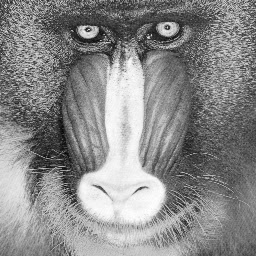

In [504]:
import numpy as np
import pathlib as pl
from PIL import Image

def load_image(path: pl.Path) -> np.ndarray:
  """
  Load 'm x n x 3' RGB image to 'm x n' numpy ndarray
  """
  image = Image.open(path)
  data = np.asarray(image)
  out = np.ndarray((len(data), len(data[0])))
  for i in range(len(data)):
    for j in range(len(data[0])):
      out[i][j] = data[i][j][0]
  return out

def create_image(data: np.ndarray) -> Image:
  """
  Create 'm x n x 3' RGB image from 'm x n' numpy ndarray
  """
  arr = np.ndarray((len(data), len(data[0]), 3))
  for i in range(len(data)):
    for j in range(len(data[0])):
      arr[i][j][0] = data[i][j]
      arr[i][j][1] = data[i][j]
      arr[i][j][2] = data[i][j]
      if (data[i][j] > 255 or data[i][j] < 0):
        print(f"Found bad value: {i}, {j}, {data[i][j]}")
  image = Image.fromarray(arr.astype(np.uint8))
  return image

original_data = load_image("images/pic3.jpg")
original_image = create_image(original_data)
original_image.show()

Now that we have our image data loaded, we want to introduce impulsive noise to the image to generate a valid test image. To do this, we introduce impulsive noise to the image by selecting pixels to be "corrupted" with a probability $p$. Then, we take these pixels that are designated to be "corrupted" and add an impulse to their grayscale value. To allow for both positive and negative impulsive noise, we wrap around the resulting RBG value.  

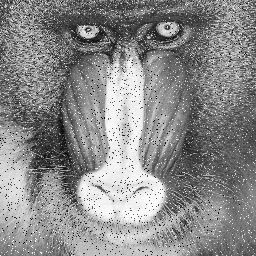

In [505]:
def apply_impulsive_noise(image_data: np.ndarray, amplitude, probability) -> np.ndarray:
  """
  Apply impulsive noise to image data
  """
  for i in range(len(image_data)):
    for j in range(len(image_data[0])):
      if (np.random.random() < probability):
          image_data[i][j] = (image_data[i][j] + amplitude) % 255
  return image_data

data = np.copy(original_data)
noisy_data = apply_impulsive_noise(data, 100, 0.05)
noisy_image = create_image(noisy_data)
noisy_image.show()

Next, we can calculate the median value for each pixel within a 3x3 window. As was previously mentioned in the explaination of the filter model, this median value will be used to determine when pixels contain noise and to estimate the original value for the pixel.

To calculate the median for pixels on the edges, we only take the median of the pixels within the image. Then, for pixels near the centre of the image, we will be taking the median over 9 different grayscale values (the centre pixel and the 8 neighboring ones) but for the pixels near the corner or the edge of the image, we will be taking the median of fewer values (4 or 6) since the window is cut off by the edge of the image. Calculating the median value for the pixel at indices $i,j$ is done in the *get_median* function below.

In [506]:
def get_median(x: np.ndarray, i, j):
  """
  Calculate median of pixel accounting for boundaries
  """
  med_vals = []
  if i > 0 and j > 0:
    med_vals.append(x[i-1][j-1])
  if i > 0:
    med_vals.append(x[i-1][j])
  if i > 0 and j < len(x[0]) - 1:
    med_vals.append(x[i-1][j+1])
  if i < len(x) - 1 and j < len(x[0]) - 1:
    med_vals.append(x[i+1][j+1])
  if i < len(x) - 1:
    med_vals.append(x[i+1][j])
  if i < len(x) - 1 and j > 0:
    med_vals.append(x[i+1][j-1])
  if j < len(x[0]) - 1:
    med_vals.append(x[i][j+1])
  if j > 0:
    med_vals.append(x[i][j-1])
  med_vals.append(x[i][j])
  med_vals.sort()
  return med_vals[len(med_vals) // 2]


To contrast our improved filter model, we can illustrate the usage of the historically used median filters by constructing an image out of the median value for each pixel. What we see is a smoothed out or softened version of the original image, where local extremes are toned down to the median for the 3x3 window around that pixel.

As we can see below, the median filters that have been traditionally used do an acceptable job at removing noise from the image but it is at the expense of image quality as many sharp edges and details in the picture appear smoothed or blurred.

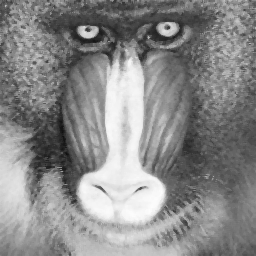

In [507]:
median_data = np.copy(original_data)
def apply_median_filter(x: np.ndarray):
  """
  Apply median filter, for comparison
  """
  filtered = np.copy(x)
  for i in range(len(x)):
    for j in range(len(x[0])):
      filtered[i][j] = get_median(x, i, j)
  return filtered
median = apply_median_filter(median_data)
median_image = create_image(median)
median_image.show()


Now, that we have a way of finding the median values for the image, we can test our filter models. First, we want to test the rudimentary filter for a baseline. This way, we can see what the minimum attempt at filtering this data produces. We see that the rudimentary filter is somewhat successful at identifying which pixels are corrupted but then it is relatively poor at estimating the correct value for that pixel. This makes sense since we again see that the detection threshold, $\beta$ has a large influence on the estimation for the corrupted pixel.

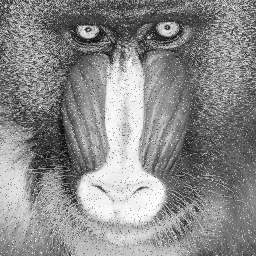

In [508]:
def apply_rudimentary_filter(x: np.ndarray, beta):
  """
  Apply rudimentary version of the filter, with only a beta value
  """
  filtered = np.copy(x)
  for i in range(len(x)):
    for j in range(len(x[0])):
      m = get_median(x, i, j)
      if filtered[i][j] > m + beta:
        filtered[i][j] = m + beta
      elif filtered[i][j] < m - beta:
        filtered[i][j] = m - beta

      if filtered[i][j] > 255: filtered[i][j] = 255
      if filtered[i][j] < 0:   filtered[i][j] = 0

  return filtered

rudimentary_data = apply_rudimentary_filter(noisy_data, 70)
rudimentary_image = create_image(rudimentary_data)
rudimentary_image.show()

Finally, we implement the refined filter model and inspect the results. To implement the refined filter, we use the equation that was outlined above to produce the value for each pixel. We use default values for $\beta$ and $\delta$ as was outlined in the simulation done by the original authors.

We see a much better result than the rudimentary filter with most of the noise filtered out. Unfortunately, there are still artifacts in the image due to the local mean being influenced by the impulsive noise values. As was mentioned earlier, even slightly lowering the probability of impulsive noise greatly improves the performance of our filter. For now however, we will continue with a 10% probabilty a pixel contains impulsive noise to maintain consistency with the paper.

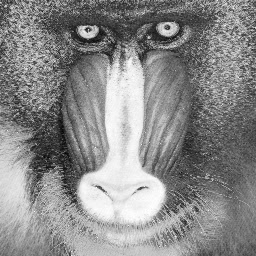

In [509]:
def apply_filter(x: np.ndarray, beta, delta):
  """
  Apply filter
  """
  filtered = np.copy(x)
  for i in range(len(x)):
    for j in range(len(x[0])):

      m = get_median(x, i, j)
      filtered[i][j] = m - ((beta + delta) / (2 * delta)) * abs( m + beta - x[i][j] ) \
                     + ((beta + delta) / (2 * delta)) * abs( m - beta - x[i][j]) \
                     - (beta) / (2 * delta) * abs(m - beta - delta - x[i][j]) \
                     + (beta) / (2 * delta) * abs(m + beta + delta - x[i][j])
      if filtered[i][j] > 255: filtered[i][j] = 255
      if filtered[i][j] < 0:   filtered[i][j] = 0

  return filtered

filtered_data = apply_filter(noisy_data, 70, 1)
filtered_image = create_image(filtered_data)
filtered_image.show()
  

### Filter Performance

To gauge the performance of the filter, we can take the average difference in the grayscale values for each pixel over the entire image. What this gives us is a rough permormance metric for the filter, as obviously a better filter will produce an image that is closest to the original image. 

To compute this performance metric, we use the following *calculate_image_difference* function.

In [510]:
def calculate_image_difference(x: np.ndarray, y: np.ndarray):
  """
  Find's the average RGB difference per pixel for the two images.
  In other words, calculates a "score" for a filter to see how
  the filtered image compares to the original
  """
  assert len(x) == len(y)
  assert len(x[0]) == len(y[0])

  diff = 0
  for i in range(len(x)):
    for j in range(len(x[0])):
      diff += abs(x[i][j] - y[i][j]) 

  return diff / (len(x) * len(x[0]))



##### Image 1 Results
Median Filter Results: 3.40

| Beta  | Delta | Result | Delta  | Result  | Delta | Result  | Delta | Result  | Best Result| 
|-------|-------|--------|--------|---------|-------|---------|-------|---------|------------|
| 20    | 1     |  1.56  | 2      | 1.54    |  5    |  1.47   | 10    |  1.39   |  1.39      |
| 40    | 1     |  0.98  | 2      | 0.96    |  5    |  0.94   | 10    |  0.92   |  0.92      |
| 60    | 1     |  0.83  | 2      | 0.83    |  5    |  0.83   | 10    |  0.84   |  0.83      |
| 80    | 1     |  1.02  | 2      | 1.03    |  5    |  1.09   | 10    |  1.23   |  1.02      |

For image 1, we see that the best results come with $\beta$ = 60, $\delta$ = 1. If we fine tune this, we can find that for this image, the best values are acutally $\beta$ = 55, $\delta$ = 1. For these values, we get an average difference of 0.83 per pixel, and we see that the image that is produced by these parameters is quite good, certainly better than the image produced by the median filter.

<center><img src="images/pic1_noisy.jpg"/></center>
<p style="text-align: center"><i>Image 1 Noisy</i></p>

<center><img src="images/pic1_median.jpg"/></center>
<p style="text-align: center"><i>Image 1 with Median Filter</i></p>

<center><img src="images/pic1_filtered.jpg"/></center>
<p style="text-align: center"><i>Image 1 with Proposed Filter</i></p>

##### Image 2 Results
Median Filter Results: 6.82

| Beta  | Delta | Result | Delta  | Result  | Delta | Result  | Delta | Result  | Best Result| 
|-------|-------|--------|--------|---------|-------|---------|-------|---------|------------|
| 20    | 1     |  3.52  | 2      | 3.46    |  5    |  3.31   | 10    |  3.10   |  3.10      |
| 40    | 1     |  1.94  | 2      | 1.92    |  5    |  1.86   | 10    |  1.79   |  1.79      |
| 60    | 1     |  1.54  | 2      | 1.53    |  5    |  1.53   | 10    |  1.54   |  1.53      |
| 80    | 1     |  1.91  | 2      | 1.94    |  5    |  2.04   | 10    |  2.25   |  1.91      |

For image 2, we see that the best results again come with $\beta$ = 60, $\delta$ = 2. Again, by fine tuning these results, we find beta doesn't change and we still have $\beta$ = 60, $\delta$ = 2 as best. For these values, we get an average difference of 1.53 per pixel.

<center><img src="images/pic2_noisy.jpg"/></center>
<p style="text-align: center"><i>Image 2 Noisy</i></p>

<center><img src="images/pic2_median.jpg"/></center>
<p style="text-align: center"><i>Image 2 with Median Filter</i></p>

<center><img src="images/pic2_filtered.jpg"/></center>
<p style="text-align: center"><i>Image 2 with Proposed Filter</i></p>

##### Image 3 Results
Median Filter Results: 14.61

| Beta  | Delta | Result | Delta  | Result  | Delta | Result  | Delta | Result  | Best Result| 
|-------|-------|--------|--------|---------|-------|---------|-------|---------|------------|
| 20    | 1     |  10.35 | 2      | 10.23   |  5    |  9.91   | 10    |  9.46   |  9.46      |
| 40    | 1     |  6.43  | 2      | 6.37    |  5    |  6.18   | 10    |  5.90   |  5.90      |
| 60    | 1     |  4.33  | 2      | 4.30    |  5    |  4.23   | 10    |  4.13   |  4.13      |
| 80    | 1     |  4.05  | 2      | 4.09    |  5    |  4.18   | 10    |  4.34   |  4.09      |

For image 3, we see that the best results come with $\beta$ = 80 and with $\delta$ = 10. But, when we fine tune these results, we find $\beta$ = 75, $\delta$ = 1 is best. For these values, we get an average difference of 3.93 per pixel. Again, the performance of the proposed filter is much better than the performance of the median filter, both in difference from the original image and in appearance.

<center><img src="images/pic3_noisy.jpg"/></center>
<p style="text-align: center"><i>Image 3 Noisy</i></p>

<center><img src="images/pic3_median.jpg"/></center>
<p style="text-align: center"><i>Image 3 with Median Filter</i></p>

<center><img src="images/pic3_filtered.jpg"/></center>
<p style="text-align: center"><i>Image 3 with Proposed Filter</i></p>


So we see overall, having a small $\delta$ value of around 1 produces the best result for all images but each image has a slightly different optimal $\beta$ value, normally around 60.
We experimented with smaller $\delta$ values but didn't seem to get any significant increase in performance.
Overall, we see that the performance of the proposed filter is much better than the performance of the traditional median filter, both in mathematical difference from the original image and in visual appearance. We tend to see that the median filtered image is relatively good at removing noise but is smooths the image a lot which reduces visual clarity and overall image quality. In contrast, the proposed filter model is quite good at preserving sharp details in the image.

### Conclusion
Overall, we can see that the method described for filtering out impulsive noise in the paper was fairly successful. Certainly, when compared to the median filter, the proposed filter model does a much better job at preserving details in the image and not smoothing out the image.
While the filter is quite impressive, we can still see some noise present due to the relatively high noise probability to begin with, 10%. To see how good the proposed filter is at filtering lower noise quantities, we can lower the noise probability.

To test this, we can lower the noise probabilty to 5% and inspect the filtered image quality.

<center><img src="images/pic1_5_filtered.jpg"/></center>
<p style="text-align: center"><i>Image 1 with Proposed Filter, 5% Noise Probability</i></p>

As expected, the resultant image quality is **greatly** improved and we can see the performance of the propsed filter is quite good. Overall, we can confirm the findings in the paper and agree that the proposed filter provides a  significant improvment to conventional median filters.